#### Introduction  
>기업 매출 데이터에 따르면, 상품 분류 별로 월별 증감율이 다르다.</br>따라 시각화를 통해 기업 매출 데이터에 어느 부분에 특이점을 알아보기 위해 자료를 시각화하여 분석한다.

#### 1. 소분류 중분류별 증가률 찾기

In [275]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('dataset/대분류코드_rate.pkl')
df

구매월,1,2,3,4,5,6,7,8,9,10,...,2_to_3,3_to_4,4_to_5,5_to_6,6_to_7,7_to_8,8_to_9,9_to_10,10_to_11,11_to_12
대분류코드,,,,,,,,,,,,,,,,,,,,,
1,3990902560,1893295550,2246471230,2323541910,2454699900,2375256140,2379892100,3750087280,2821486310,2204613460,...,18.654017,3.430744,5.644744,-3.236394,0.195177,57.573836,-24.762116,-21.863400,15.199658,7.926678
2,2721915580,2394034760,3027593800,3018335340,3842903150,3091997460,3459848130,2580913770,2984574330,3583268960,...,26.464070,-0.305803,27.318628,-19.540063,11.896862,-25.403842,15.640219,20.059632,6.053595,3.593332
3,640063510,582114640,685967040,713391840,782820040,637779330,502612990,547864930,702693040,776776600,...,17.840541,3.997976,9.732127,-18.527976,-21.193277,9.003337,28.260270,10.542805,13.987509,-4.125249
4,6239797810,5541265350,6230621330,5595249340,5910940820,4992376400,4777645600,4272319600,5237055670,7590717340,...,12.440407,-10.197570,5.642134,-15.540071,-4.301174,-10.576883,22.581084,44.942460,22.087669,-17.399940
5,1462232590,962130610,1189110840,1395462770,1434504380,1286640870,995488180,762248310,1109024930,1749318990,...,23.591416,17.353465,2.797754,-10.307637,-22.628901,-23.429698,45.493918,57.734866,13.229423,-5.427521
6,1618832130,1397057400,1855666360,2290767720,2303110350,1999273900,1590898860,1295810240,1680368640,2498504090,...,32.826780,23.447176,0.538799,-13.192440,-20.426168,-18.548547,29.677061,48.687855,3.633786,-5.901285
7,998370750,1065401660,1111064270,993455370,1083330860,1237051670,1139173450,1027693590,979129120,1126605290,...,4.285953,-10.585247,9.046757,14.189646,-7.912218,-9.786030,-4.725579,15.061974,15.896101,-20.231633
8,2145306330,2113292050,2388782750,2272114050,2719298850,2033185770,1876134560,2193058720,1901186870,2650809030,...,13.036092,-4.884023,19.681442,-25.231250,-7.724391,16.892400,-13.308894,39.429168,27.454105,-7.302478
9,1140252000,1130719980,1247051750,1326076910,1268460610,1213427530,1086405570,1308562160,1185932580,1713803630,...,10.288292,6.336959,-4.344869,-4.338572,-10.468030,20.448771,-9.371322,44.511051,2.620067,-27.209308


##### 시각화 함수 설정

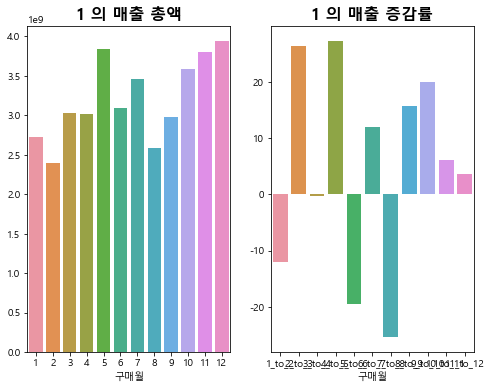

In [276]:
def slice_df(df:pd.DataFrame,index:int) -> tuple:
    """
    데이터프레임 슬라이싱 / a1 = 1월~12월 매출  , a2 = 1월~12월 매출증감
    
    Slice DataFrame by month and Inc/Dec

    Args:
        df (pd.DataFrame): Sales DataFrame
        index (int): Month or Inc/Dec

    Returns:
        tuple: df1(DataFrame for month), df2(DataFrame for Inc/Dec), index
    """
    df1 = df.iloc[[index]].iloc[:,:12] 
    df2 = df.iloc[[index]].iloc[:,12:] 
    index = df.index[index-1]
    
    return (df1, df2 , index)

def visualization_sales_per(df1:pd.DataFrame, df2:pd.DataFrame, index:int) -> None:
    """
    슬라이싱된 두 데이터(매출총합, 매출증감)을 각각 시각화
    Visualization DataFrames
    
    Args:
        df1: DataFrame for month
        df2: DataFrame for Inc/Dec
    """
    import matplotlib.pyplot as plt
    from matplotlib import rc # for setting korean font in colab
    import numpy as np

    rc('font',family='Malgun Gothic') # 한글 폰트 설정
    plt.rcParams['axes.unicode_minus'] = False #
    
    
    def bar_color(df,color1,color2):        
        return np.where(df.values>0,color1,color2).T
    
    fig, ax = plt.subplots(ncols=2,figsize=(8, 6))
    
    sns.barplot(data=df1,ax=ax[0])
    sns.barplot(data=df2,ax=ax[1])
    
    # 타이틀
    ax[0].set_title(f'{index} 의 매출 총액',fontsize=16,fontweight='bold')
    ax[1].set_title(f"{index} 의 매출 증감률",fontsize=16,fontweight='bold')
    
def df_visualization(df:pd.DataFrame,index:int)->None:
    """
    두 함수 종합 (데이터프레임, 보고자하는인덱스 넣으면 데이터프레임의 해당 인덱스(한개)에 대한 그래프 반환)
    Total_Visualization Function
    """
    df1, df2, index = slice_df(df,index)
    visualization_sales_per(df1,df2,index)

#Example   
df_visualization(df, 1)

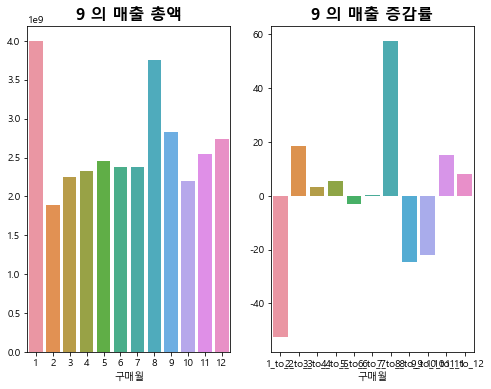

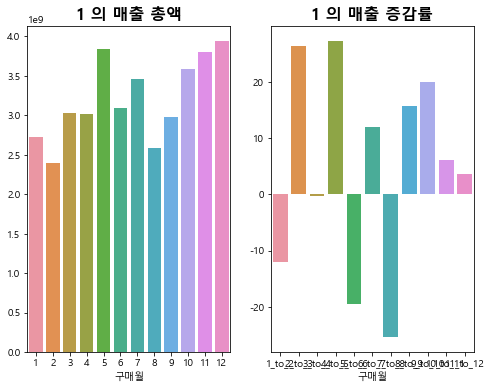

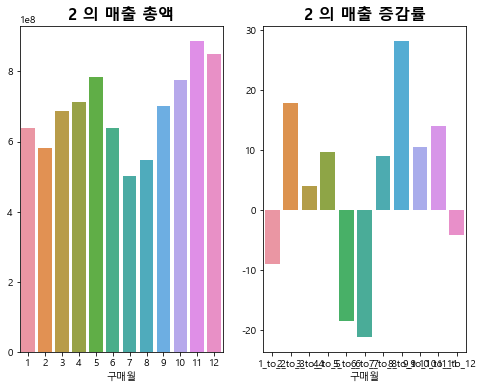

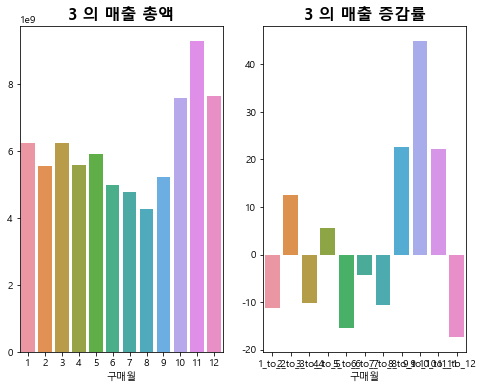

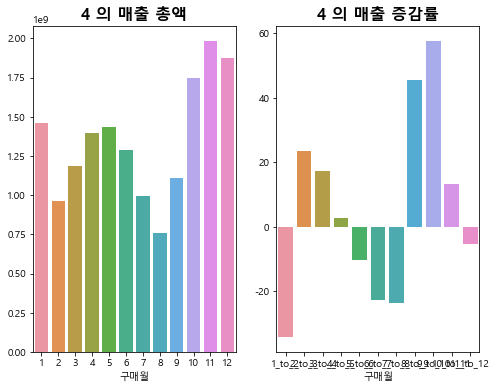

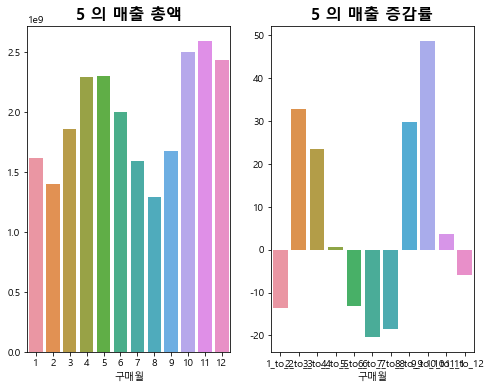

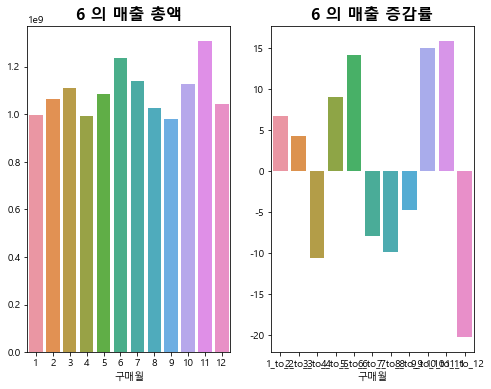

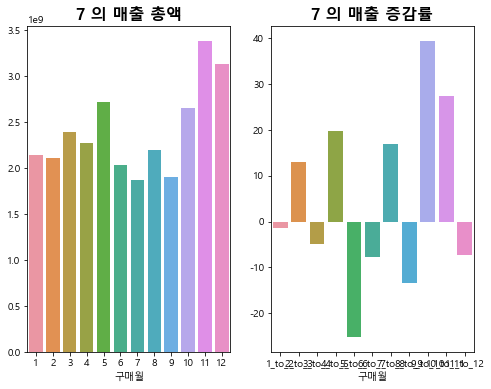

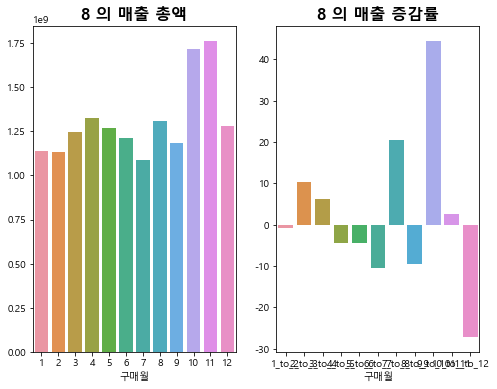

In [277]:
# For Loop Example
for i in range(len(a)):
    df_visualization(df, i)